In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 7000)
pd.set_option('max_colwidth', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-super-store-dataset/Global_Superstore2.xlsx
/kaggle/input/global-super-store-dataset/Global_Superstore2.csv


In [2]:
%%time
df = pd.read_csv('/kaggle/input/global-super-store-dataset/Global_Superstore2.csv',encoding='latin-1')

CPU times: user 268 ms, sys: 33.9 ms, total: 302 ms
Wall time: 391 ms


In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wireless Headset System,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [5]:
import pandasql as ps

In [6]:
q1 = """SELECT distinct "Ship Mode","Category" FROM df """

print(ps.sqldf(q1, locals()))

         Ship Mode         Category
0         Same Day       Technology
1     Second Class        Furniture
2      First Class       Technology
3     Second Class       Technology
4      First Class        Furniture
5   Standard Class        Furniture
6   Standard Class  Office Supplies
7     Second Class  Office Supplies
8         Same Day        Furniture
9   Standard Class       Technology
10     First Class  Office Supplies
11        Same Day  Office Supplies


In [7]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [9]:
#dscription is missing the date type and categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [10]:
df.shape

(51290, 24)

There are a total of 51290 entries with a net of 24 features
Things to take care about a feature - 
1. Are the features catgorical? (Encode them!)
2. Are the features in outlying ranges? (Normalize or standardize them!)
3. Does the feature contains "null" values? (Replace or remove them!)
4. Are their any outliers?


In [11]:
#Checking null values
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [12]:
# In postal code 41296/51290 i.e. approximately 80% of the entries are null
#Let's check the categorical (non-numeral) values
cat = df.select_dtypes(exclude=['int64','float64']).columns
cat

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')

Non-categorical features

In [13]:
#Non-categorical features
num_colms = df._get_numeric_data()
num_colms.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,10024.0,2309.650,7,0.0,762.1845,933.57
1,26341,NaN,3709.395,9,0.1,-288.7650,923.63
2,25330,NaN,5175.171,9,0.1,919.9710,915.49
3,13524,NaN,2892.510,5,0.1,-96.5400,910.16
4,47221,NaN,2832.960,8,0.0,311.5200,903.04


In [14]:
#Please note that some features like row_id are not really having direct impact on our target variable
#We might exclude them later on after analyzing the correlation of specifc variables

**Let us do the correlation check usin pre-defined libraries in Python**

In [15]:
attributes = ['Sales','Quantity','Discount','Profit']
corr_mat = df.corr()
corr_mat

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039078,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000


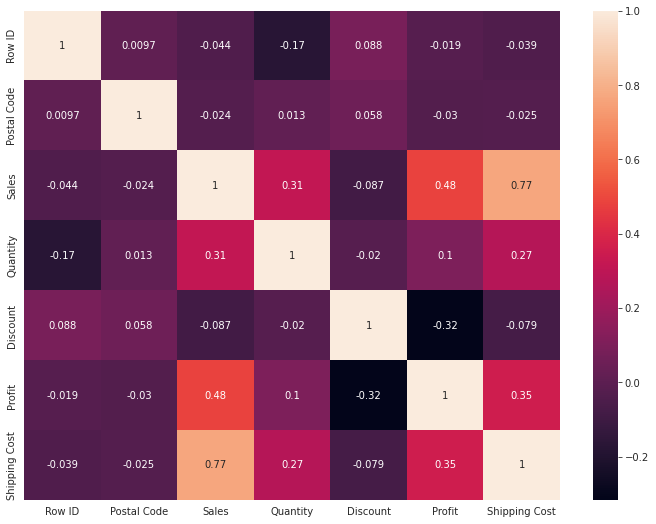

In [16]:
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)
plt.show()

**After looking at the data, I believe that we can derive out several customer-based and product-based insights from this data. These insights can later-on help us in determining the methods to increase the profit.**

**Let us have a look at the purchasing tendency of customers
**

In [17]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [18]:
#Let us temporarily drop the duplicates and only focus on those features
#that can help us in determining the purchasing tendency of customers
data_customer = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']].drop_duplicates()

In [19]:
data_customer.count()

Customer ID    25754
Order ID       25754
Order Date     25754
Ship Date      25754
Ship Mode      25754
Country        25754
dtype: int64

In [20]:
#Only 25754 rows are coming up after giving up duplicate values
data_customer.head()

,Customer ID,Order ID,Order Date,Ship Date,Ship Mode,Country
0,RH-19495,CA-2012-124891,2012-07-31,2012-07-31,Same Day,United States
1,JR-16210,IN-2013-77878,2013-05-02,2013-07-02,Second Class,Australia
2,CR-12730,IN-2013-71249,2013-10-17,2013-10-18,First Class,Australia
3,KM-16375,ES-2013-1579342,2013-01-28,2013-01-30,First Class,Germany
4,RH-9495,SG-2013-4320,2013-05-11,2013-06-11,Same Day,Senegal


In [21]:
data_customer['Customer ID'].nunique()

1590

In [22]:
#Out of 25754 also, about 1590 are unique, rest are duplicates by the point-of-view of customers
#On the basis of customer_id, let's group the features into 

def new_features(x):
    d = []
    d.append(x['Order ID'].nunique())
    d.append(x['Sales'].sum())
    d.append(x['Shipping Cost'].sum())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['City'].nunique())
    return pd.Series(d, index=['Purchases','Total_Sales','Total_Cost','First_Purchase_Date','Latest_Purchase_Date','Location_Count'])

df_customer = df.groupby('Customer ID').apply(new_features)

In [23]:
df_customer.columns

Index(['Purchases', 'Total_Sales', 'Total_Cost', 'First_Purchase_Date',
       'Latest_Purchase_Date', 'Location_Count'],
      dtype='object')

In [24]:
df_customer.shape

(1590, 6)

In [25]:
#Now the duplicate values of the features are removed in the basis of customer_id
#Let us find the customer retention timing as that can be an important parameter in determining the efficacy of superstore
from datetime import datetime
df_customer['Duration'] = (df_customer['Latest_Purchase_Date'] - df_customer['First_Purchase_Date']).dt.days

In [26]:
# Customer shopping frequency = (Duration of its association with store)/(count of purchases)
df_customer['Frequency'] = df_customer['Duration']/df_customer['Purchases']
df_customer['Frequency'].head()

Customer ID
AA-10315     71.736842
AA-10375     58.434783
AA-10480     66.650000
AA-10645     39.527778
AA-315      177.285714
Name: Frequency, dtype: float64

In [27]:
df_customer.head()

,Purchases,Total_Sales,Total_Cost,First_Purchase_Date,Latest_Purchase_Date,Location_Count,Duration,Frequency
Customer ID,,,,,,,,
AA-10315,19,13747.41300,1236.15,2011-03-31,2014-12-23,18,1363,71.736842
AA-10375,23,5884.19500,903.92,2011-04-21,2014-12-25,23,1344,58.434783
AA-10480,20,17695.58978,1633.67,2011-01-11,2014-09-05,20,1333,66.650000
AA-10645,36,15343.89070,1752.27,2011-01-12,2014-12-05,35,1423,39.527778
AA-315,7,2243.25600,215.80,2011-08-06,2014-12-29,7,1241,177.285714


In [28]:
df_customer['Frequency'].describe()

count    1590.000000
mean      111.303339
std        80.489358
min         0.000000
25%        50.669643
50%        73.055728
75%       155.083333
max       655.500000
Name: Frequency, dtype: float64

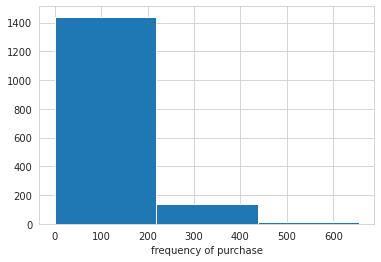

In [29]:
#Mean frequency is 111, with max and min be 655 and 0 respectively. 
#Profile of a customer is based on his/her frequency of purchase
plt.hist(df_customer['Frequency'], bins=3)
plt.xlabel('frequency of purchase')
plt.show()

In [30]:
#Fragmenting this data better to get more specific insights 
def frequency(x):
    if x < 219:
        return 'Low' 
    elif x < 436:
        return 'Medium' 
    else:
        return 'High'

df_customer['Frequency'] = df_customer.Frequency.apply(frequency)

df_customer['Frequency'].value_counts()

Low       1442
Medium     138
High        10
Name: Frequency, dtype: int64

In [31]:
#Insights 1 - 
#Almost 1442 customers have a low freuquency of purchase.
#Approx 8% customers have a medium freuquency whereas 10 customers on the whole have a high frequency of purchase.
#Checking the altered table
df_customer.head()

,Purchases,Total_Sales,Total_Cost,First_Purchase_Date,Latest_Purchase_Date,Location_Count,Duration,Frequency
Customer ID,,,,,,,,
AA-10315,19,13747.41300,1236.15,2011-03-31,2014-12-23,18,1363,Low
AA-10375,23,5884.19500,903.92,2011-04-21,2014-12-25,23,1344,Low
AA-10480,20,17695.58978,1633.67,2011-01-11,2014-09-05,20,1333,Low
AA-10645,36,15343.89070,1752.27,2011-01-12,2014-12-05,35,1423,Low
AA-315,7,2243.25600,215.80,2011-08-06,2014-12-29,7,1241,Low


**Let us now check if high frequency customers are contributing more to the profit**

In [32]:
result = df.groupby(["Customer Name"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)


In [33]:
df_customer['Revenue'] = df_customer['Purchases'] *  df_customer['Total_Sales']

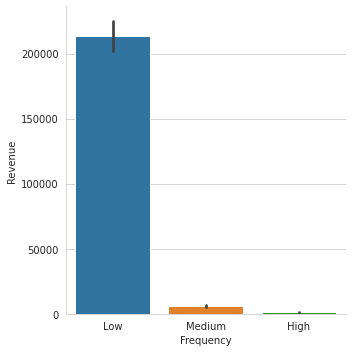

In [34]:
sns.catplot(x="Frequency", y="Revenue", kind="bar", data=df_customer);

In [35]:
#Therefore, high and medium frequency customers are having less significant contribution than the low frequency customers.

**Let us check the profit distribution as per the segments of customers**

In [36]:
profit_margin = df_customer.groupby('Frequency')

<AxesSubplot:xlabel='Segment', ylabel='count'>

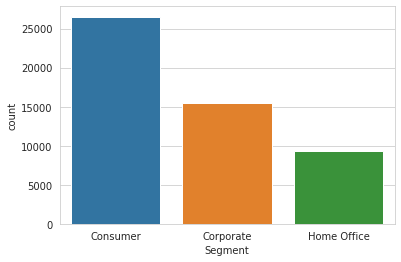

In [37]:
sns.countplot(x="Segment",data = df)

In [38]:
#Significantly higher footfall has been witnessed in consumer segment as compared to the corporate and home segment. 
#Let's try and analyze the consumer-wise footfall on an year-wise basis


df_x = df
df_x['year'] = pd.DatetimeIndex(df['Order Date']).year
df_x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wireless Headset System,2309.650,7,0.0,762.1845,933.57,Critical,2012
1,26341,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013
4,47221,SG-2013-4320,2013-05-11,2013-06-11,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013


<Figure size 1728x1080 with 0 Axes>

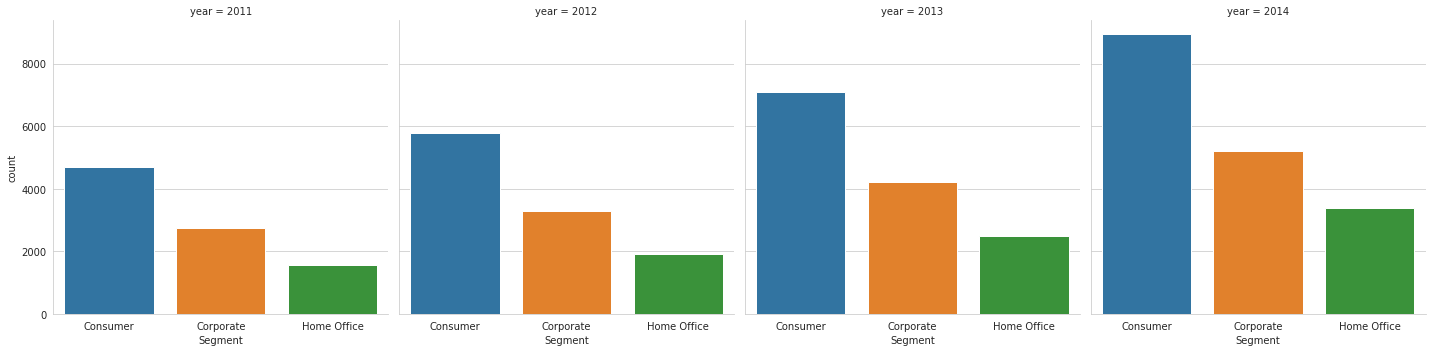

In [39]:
plt.figure(figsize=(24,15))
sns.catplot(x="Segment", col="year", data=df_x, kind="count")
plt.show()

In [40]:
#Its is clear that all the three segments are witnessing a linear growth in footfall across the years. 
#However, from 2011 to 2014, Consumers segment has been leading in terms of footfall. 

**Let us have a look at the country-wise distribution of customers**

In [41]:
customer_country = pd.DataFrame({'Count' : df.groupby(["Country"]).size()}).reset_index().sort_values('Count',ascending = False).head(10)

In [42]:
customer_country


,Country,Count
139,United States,9994
6,Australia,2837
44,France,2827
81,Mexico,2644
47,Germany,2065
26,China,1880
138,United Kingdom,1633
17,Brazil,1599
57,India,1555
58,Indonesia,1390


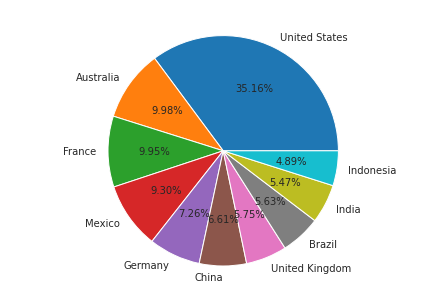

In [43]:
#The data belongs to a total of 10 countries
# Let us visualize in form of a pie chart to analyze th epercentage distribution of customers along several countries
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Countries = customer_country['Country']
cust_count = customer_country['Count']
ax.pie(cust_count, labels = Countries,autopct='%1.2f%%')
plt.show()

In [44]:
#United states is leading the race by contributing to approximately 1/3rd of the total customers in the superstore. 
#Highest chunk of customers comes from North and South America. Second highest amount of customers are Asian, whereas the rest
#are of European origin. 


**Let us now analyze the country-wise sales of superstore**

Text(0.5, 0, 'Countries')

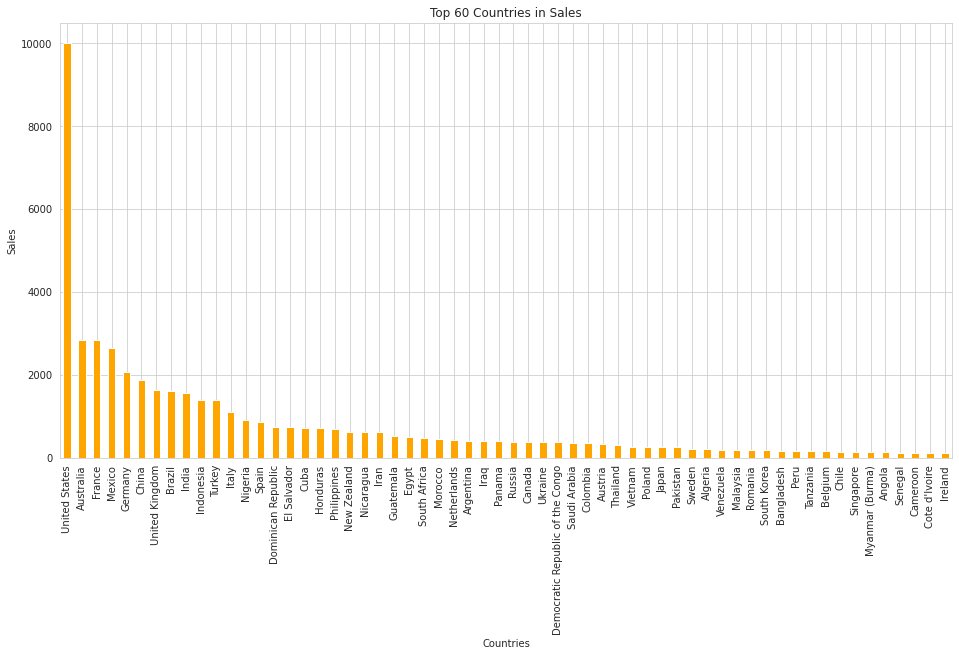

In [45]:
plt.figure(figsize=(16,8))
countries = df.groupby('Country')['Sales'].count().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='orange')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Sales')
plt.xlabel('Countries')

In [46]:
#Sales of the top 10 countries comprises about 40-50% of the total sales. 
#United States clearly leads this race with its sale being approximately 4 times more than its closest competitor. 


**Let us analyze the product-wise profits of the superstore**

In [47]:
products = df.groupby('Product Name')['Profit'].count().sort_values(ascending=False)

products.head()

Product Name
Staples                           227
Cardinal Index Tab, Clear          92
Eldon File Cart, Single Width      90
Rogers File Cart, Single Width     84
Ibico Index Tab, Clear             83
Name: Profit, dtype: int64

In [48]:
#Staples contribute to about 40% of the total profit coming from the top 5 products. 
#Document arranging solutions like File carts (Eldon and Rodgers) and Index Tabs are the top 3 out of 5 top-most profitable product.

**Let us analyze the time it takes to deliver the products to different countries**

In [49]:
df_x = df.drop_duplicates()

df_x['Order_to_Ship_Days'] = (pd.to_datetime(df_x['Ship Date']) 
                                           - pd.to_datetime(df_x['Order Date'])).dt.days

Text(0.5, 0, 'Countries')

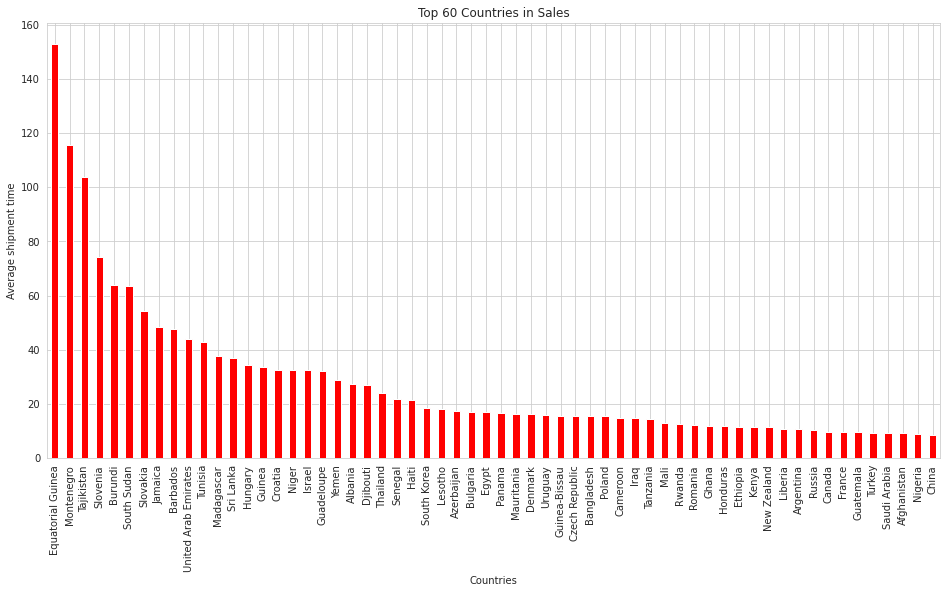

In [50]:
plt.figure(figsize=(16,8))
countries = df_x.groupby('Country')['Order_to_Ship_Days'].mean().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='red')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Average shipment time')
plt.xlabel('Countries')

In [51]:
#On an average, middle eastern and African countries are having a shipment duration of 50-60 days.